In [1]:
pip install tweepy  #installing tweepy library to access twitter API

Note: you may need to restart the kernel to use updated packages.


In [2]:
# -*- coding: utf-8 -*-

In [3]:
pip install credentials        # installing credentials library to access twitter API

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd           #importing required libraries
import tweepy             

witter API credentials

In [5]:
consumer_key = "ZmJB7gpGF6xJQc8MmnPz0meni"
consumer_secret = "1hFA2EjXXGA6LQ9LAwXcKPrs11AyGxN78P7jnTvTHK5ZEAXcGf"
access_key = "1304283478335262727-d7s4n2tcTeggmILpMwmJLWsbqpTAiC"
access_secret = "cUvjZ7WyBkQgxpDg1IbZ2SWZED19F4jtmwqZyqfDmIHyX"

In [6]:
alltweets = []

In [7]:
def get_all_tweets(imVkohli):                                #accessing and obtaining required twitter account's data
    auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    new_tweets = api.user_timeline(screen_name = imVkohli,count=200)
    alltweets.extend(new_tweets)
    
    oldest = alltweets[-1].id - 1
    while len(new_tweets)>0:
        new_tweets = api.user_timeline(screen_name = imVkohli,count=200,max_id=oldest)
        #save most recent tweets
        alltweets.extend(new_tweets)
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        print ("...%s tweets downloaded so far" % (len(alltweets)))                # tweet.get('user', {}).get('location', {})
 
    outtweets = [[tweet.created_at,tweet.entities["hashtags"],tweet.entities["user_mentions"],tweet.favorite_count,
                  tweet.geo,tweet.id_str,tweet.lang,tweet.place,tweet.retweet_count,tweet.retweeted,tweet.source,tweet.text,
                  tweet._json["user"]["location"],tweet._json["user"]["name"],tweet._json["user"]["time_zone"],
                  tweet._json["user"]["utc_offset"]] for tweet in alltweets]
    
    import pandas as pd
    tweets_df = pd.DataFrame(columns = ["time","hashtags","user_mentions","favorite_count",
                                    "geo","id_str","lang","place","retweet_count","retweeted","source",
                                    "text","location","name","time_zone","utc_offset"])
    tweets_df["time"]  = pd.Series([str(i[0]) for i in outtweets])
    tweets_df["hashtags"] = pd.Series([str(i[1]) for i in outtweets])
    tweets_df["user_mentions"] = pd.Series([str(i[2]) for i in outtweets])
    tweets_df["favorite_count"] = pd.Series([str(i[3]) for i in outtweets])
    tweets_df["geo"] = pd.Series([str(i[4]) for i in outtweets])
    tweets_df["id_str"] = pd.Series([str(i[5]) for i in outtweets])
    tweets_df["lang"] = pd.Series([str(i[6]) for i in outtweets])
    tweets_df["place"] = pd.Series([str(i[7]) for i in outtweets])
    tweets_df["retweet_count"] = pd.Series([str(i[8]) for i in outtweets])
    tweets_df["retweeted"] = pd.Series([str(i[9]) for i in outtweets])
    tweets_df["source"] = pd.Series([str(i[10]) for i in outtweets])
    tweets_df["text"] = pd.Series([str(i[11]) for i in outtweets])
    tweets_df["location"] = pd.Series([str(i[12]) for i in outtweets])
    tweets_df["name"] = pd.Series([str(i[13]) for i in outtweets])
    tweets_df["time_zone"] = pd.Series([str(i[14]) for i in outtweets])
    tweets_df["utc_offset"] = pd.Series([str(i[15]) for i in outtweets])
    tweets_df.to_csv(imVkohli+"_tweets.csv")
    return tweets_df

In [8]:
kohli= get_all_tweets("imVkohli")      #downloading all the tweets from selected twitter account

...400 tweets downloaded so far
...600 tweets downloaded so far
...800 tweets downloaded so far
...1000 tweets downloaded so far
...1200 tweets downloaded so far
...1400 tweets downloaded so far
...1600 tweets downloaded so far
...1800 tweets downloaded so far
...2000 tweets downloaded so far
...2200 tweets downloaded so far
...2332 tweets downloaded so far
...2332 tweets downloaded so far


In [9]:
kohli

,time,hashtags,user_mentions,favorite_count,geo,id_str,lang,place,retweet_count,retweeted,source,text,location,name,time_zone,utc_offset
0,2021-01-26 04:58:01,[],[],174424,None,1353930169791115264,en,None,9816,False,Twitter for Android,The future depends on what we do today. Let's ...,,Virat Kohli,None,None
1,2021-01-25 05:08:17,[],"[{'screen_name': 'MarcBartra', 'name': 'Marc B...",66462,None,1353570362282270721,en,None,2943,False,Twitter for Android,Teamed up with @MarcBartra @officialasafa @pum...,,Virat Kohli,None,None
2,2021-01-25 04:03:45,[],"[{'screen_name': 'cheteshwar1', 'name': 'chete...",179218,None,1353554122817953792,en,None,8427,False,Twitter for Android,Happy birthday pujji @cheteshwar1. Wish you g...,,Virat Kohli,None,None
3,2021-01-24 05:07:28,[],[],30720,None,1353207771647275010,en,None,1767,False,Twitter for Android,We do everything online today. Why not footbal...,,Virat Kohli,None,None
4,2021-01-23 05:03:21,"[{'text': 'one8blends', 'indices': [0, 11]}]","[{'screen_name': 'one8world', 'name': 'one8', ...",39025,None,1352844347809681409,en,None,2013,False,Twitter for Android,#one8blends - Your secret to confidence. 👍\nGe...,,Virat Kohli,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2327,2009-09-22 09:44:31,[],"[{'screen_name': 'yuvsingh09', 'name': 'Yuvraj...",63,None,4168829709,en,None,14,False,Twitter Web Client,@yuvsingh09 Hello Mr.Bond \nwatched it you wer...,,Virat Kohli,None,None
2328,2009-09-22 08:46:33,[],"[{'screen_name': 'hulk7174', 'name': 'Anol Pro...",43,None,4168263153,und,None,9,False,Twitter Web Client,@hulk7174 ??????,,Virat Kohli,None,None
2329,2009-09-22 07:32:46,[],[],122,None,4167514786,en,None,53,False,Twitter Web Client,Time for Training....,,Virat Kohli,None,None
2330,2009-09-10 15:36:10,[],[],122,None,3889494504,en,None,61,False,Twitter Web Client,Will be heading to SriLanka Woohoo !!!,,Virat Kohli,None,None


In [10]:
pip install spacy       #installing spacy library for natural languge processing

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install wordcloud  #installing wordcloud library for visual representation of text data

In [12]:
import numpy as np             #import all the required libraries
import pandas as pd
import string
import spacy
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [13]:
kohli.drop(['hashtags'],inplace=True,axis=1)          #drop the cloumns that is not required to perform NLP
kohli.drop(['user_mentions'],inplace=True,axis=1)
kohli.drop(['favorite_count'],inplace=True,axis=1)
kohli.drop(['geo'],inplace=True,axis=1)
kohli.drop(['id_str'],inplace=True,axis=1)
kohli.drop(['lang'],inplace=True,axis=1)
kohli.drop(['place'],inplace=True,axis=1)
kohli.drop(['retweet_count'],inplace=True,axis=1)
kohli.drop(['retweeted'],inplace=True,axis=1)
kohli.drop(['source'],inplace=True,axis=1)
kohli.drop(['location'],inplace=True,axis=1)
kohli.drop(['name'],inplace=True,axis=1)
kohli.drop(['time_zone'],inplace=True,axis=1)
kohli.drop(['utc_offset'],inplace=True,axis=1)

In [14]:
kohli

,time,text
0,2021-01-26 04:58:01,The future depends on what we do today. Let's ...
1,2021-01-25 05:08:17,Teamed up with @MarcBartra @officialasafa @pum...
2,2021-01-25 04:03:45,Happy birthday pujji @cheteshwar1. Wish you g...
3,2021-01-24 05:07:28,We do everything online today. Why not footbal...
4,2021-01-23 05:03:21,#one8blends - Your secret to confidence. 👍\nGe...
...,...,...
2327,2009-09-22 09:44:31,@yuvsingh09 Hello Mr.Bond \nwatched it you wer...
2328,2009-09-22 08:46:33,@hulk7174 ??????
2329,2009-09-22 07:32:46,Time for Training....
2330,2009-09-10 15:36:10,Will be heading to SriLanka Woohoo !!!


In [15]:
kohli.drop(['time'],inplace=True,axis=1)

In [16]:
kohli

,text
0,The future depends on what we do today. Let's ...
1,Teamed up with @MarcBartra @officialasafa @pum...
2,Happy birthday pujji @cheteshwar1. Wish you g...
3,We do everything online today. Why not footbal...
4,#one8blends - Your secret to confidence. 👍\nGe...
...,...
2327,@yuvsingh09 Hello Mr.Bond \nwatched it you wer...
2328,@hulk7174 ??????
2329,Time for Training....
2330,Will be heading to SriLanka Woohoo !!!


In [17]:
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [18]:
kohli = [text.strip() for text in kohli.text] # remove both the leading and the trailing characters
kohli = [text for text in kohli if text] # removes empty strings, because they are considered in Python as False
kohli[0:50] 

["The future depends on what we do today. Let's be the strength of our nation and help it reach greater heights. Wish… https://t.co/myYv4wT9xZ",
 'Teamed up with @MarcBartra @officialasafa @pumacricket to test these new kicks. Light shoes, heavy work. @PUMA Fuse… https://t.co/rlOOD1nktl',
 'Happy birthday pujji @cheteshwar1.  Wish you good health, happiness and more hours at the crease 😃. Have a great year ahead.',
 'We do everything online today. Why not football? Sports &amp; learning should always continue, especially for children.… https://t.co/Vyyzeku3qC',
 '#one8blends - Your secret to confidence. 👍\nGet yours from the link below.\n\nhttps://t.co/HTFOWXdC09\n\n@one8world… https://t.co/YK0BbmyyUz',
 '#100MillionHeroes 👏🏼 @HeroMotoCorp https://t.co/QK6IIVdki2',
 'WHAT A WIN!!! Yessssss. To everyone who doubted us after Adelaide, stand up and take notice. Exemplary performance… https://t.co/pz5JhDgamH',
 '@ThePropheC is at a whole different level altogether and Sardool Saab 🙏🏼👏🏼\n\n

In [19]:
nlp = spacy.load('en_core_web_sm')   #parts of speech tagging


In [51]:
one_block=kohli[800]                    #selecting tweet of choice to visualize using spacy
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

C:\Users\ADMIN\anaconda3\lib\site-packages\spacy\displacy\__init__.py:189: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [52]:
one_block

'Wishing the champion bowler and an amazing human being @harbhajan_singh a very happy birthday. Keep inspiring and H… https://t.co/DsQZKmDTm1'

In [53]:
for token in doc_block[0:50]:          #tokenization of selected tweet to know parts of speech 
    print(token,token.pos_)


Wishing VERB
the DET
champion NOUN
bowler NOUN
and CCONJ
an DET
amazing ADJ
human ADJ
being NOUN
@harbhajan_singh NOUN
a DET
very ADV
happy ADJ
birthday NOUN
. PUNCT
Keep VERB
inspiring VERB
and CCONJ
H NOUN
… PUNCT
https://t.co/DsQZKmDTm1 NOUN


In [54]:
noun_verbs=[token.text for token in doc_block if token.pos_ in('NOUN','VERB')]
print(noun_verbs[0:40])           #extraction of noun and verbs in selected tweet

['Wishing', 'champion', 'bowler', 'being', '@harbhajan_singh', 'birthday', 'Keep', 'inspiring', 'H', 'https://t.co/DsQZKmDTm1']


In [55]:
from sklearn.feature_extraction.text import CountVectorizer    #counting of tokens i.e words
cv=CountVectorizer()

text=cv.fit_transform(noun_verbs)
sum_words=text.sum(axis=0)
words_freq=[(word,sum_words[0,idx])for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x:x[1],reverse=True)
wf_df=pd.DataFrame(words_freq)
wf_df.columns=['word','count']

wf_df[0:30]

,word,count
0,wishing,1
1,champion,1
2,bowler,1
3,being,1
4,harbhajan_singh,1
5,birthday,1
6,keep,1
7,inspiring,1
8,https,1
9,co,1


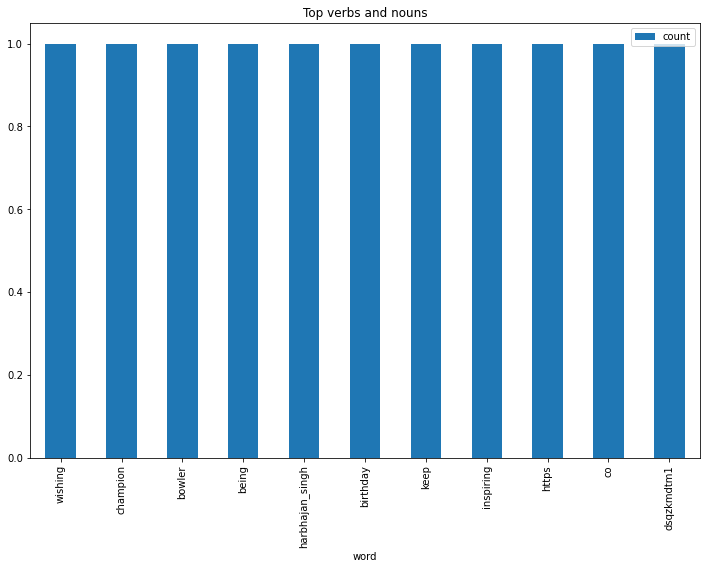

In [58]:
wf_df[0:30].plot.bar(x='word', figsize=(12,8),title='Top verbs and nouns')  #visualization of nouns and verbs in selected tweet

In [59]:
affin=pd.read_csv('Afinn.csv',sep=',',encoding='latin-1')  #read affin dataset for sentiment analysis
affin.shape

(2477, 2)

In [60]:
affin.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [61]:
affin.tail()

,word,value
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2
2476,zealous,2


In [62]:
from nltk import tokenize                         #tokenization of all the tweets
sentences=tokenize.sent_tokenize(" ".join(kohli))
sentences[5:25]

['Wish you good health, happiness and more hours at the crease 😃.',
 'Have a great year ahead.',
 'We do everything online today.',
 'Why not football?',
 'Sports &amp; learning should always continue, especially for children.… https://t.co/Vyyzeku3qC #one8blends - Your secret to confidence.',
 '👍\nGet yours from the link below.',
 'https://t.co/HTFOWXdC09\n\n@one8world… https://t.co/YK0BbmyyUz #100MillionHeroes 👏🏼 @HeroMotoCorp https://t.co/QK6IIVdki2 WHAT A WIN!!!',
 'Yessssss.',
 'To everyone who doubted us after Adelaide, stand up and take notice.',
 'Exemplary performance… https://t.co/pz5JhDgamH @ThePropheC is at a whole different level altogether and Sardool Saab 🙏🏼👏🏼\n\nhttps://t.co/gv3h99ZjF7 Outstanding application and belief by @Sundarwashi5 and @imShard.',
 'This is what test cricket is all about.',
 "Washy top… https://t.co/qpVrsJgpVf Heartbroken to hear about the demise of Hardik and Krunal's dad.",
 'Spoke to him a couple of times, looked a joyful an… https://t.co/CQNzbS

In [63]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,The future depends on what we do today.
1,Let's be the strength of our nation and help i...
2,Wish… https://t.co/myYv4wT9xZ Teamed up with @...
3,"Light shoes, heavy work."
4,@PUMA Fuse… https://t.co/rlOOD1nktl Happy birt...
...,...
2588,Thank you all for the wishes !!!!
2589,@yuvsingh09 Hello Mr.Bond \nwatched it you wer...
2590,@hulk7174 ??????
2591,Time for Training.... Will be heading to SriLa...


In [68]:
affinity_scores=affin.set_index('word')['value'].to_dict()

In [69]:
nlp=spacy.load("en_core_web_sm") #Custom function :score each word in a sentence in lemmatised form, 
sentiment_lexicon=affinity_scores  #but calculate the score for the whole original sentence.

def calculate_sentiment(text: str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
            return sent_score

In [70]:
calculate_sentiment(text= 'fantastic')  #testing of custom function to know whether it works or not

4

In [72]:
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)

In [73]:
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)  #to know the length of words in tweets
sent_df['word_count'].head(10)

0     8
1    13
2    13
3     4
4     7
5    12
6     5
7     5
8     3
9    16
Name: word_count, dtype: int64

In [74]:
sent_df

,sentence,sentiment_value,word_count
0,The future depends on what we do today.,0,8
1,Let's be the strength of our nation and help i...,0,13
2,Wish… https://t.co/myYv4wT9xZ Teamed up with @...,1,13
3,"Light shoes, heavy work.",0,4
4,@PUMA Fuse… https://t.co/rlOOD1nktl Happy birt...,0,7
...,...,...,...
2588,Thank you all for the wishes !!!!,2,7
2589,@yuvsingh09 Hello Mr.Bond \nwatched it you wer...,0,11
2590,@hulk7174 ??????,0,2
2591,Time for Training.... Will be heading to SriLa...,0,10


In [75]:
sent_df.sort_values(by='sentiment_value').head(20)

,sentence,sentiment_value,word_count
1904,Horrible day for cricket.,-3,4
2270,worst thing to have happened i still cannot be...,-3,10
2436,bloody hot today.,-3,3
2460,hate these kind of acts by stupid people.,-3,8
1354,Crazy how quickly kids evolve 💜💜 \n#TimeToFly ...,-2,19
159,Saddened to hear about the passing of Shri Pra...,-2,10
2562,Missed you guys.. Hope everyone is doing well..,-2,8
984,"Fear not, here’s the link!",-2,5
95,Crazy deals on @Flipkart #BigBillionDays!,-2,5
2488,miss the ipl times.,-2,4


In [76]:
sent_df['sentiment_value'].describe()

count    2593.000000
mean        0.311608
std         0.893698
min        -3.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.000000
Name: sentiment_value, dtype: float64

In [87]:
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
0,The future depends on what we do today.,0,8
1,Let's be the strength of our nation and help i...,0,13
3,"Light shoes, heavy work.",0,4
4,@PUMA Fuse… https://t.co/rlOOD1nktl Happy birt...,0,7
6,Have a great year ahead.,0,5


In [90]:
sent_df[sent_df['sentiment_value']>=5].head()

,sentence,sentiment_value,word_count
1248,Outstanding effort to win this game &amp; the ...,5,9
1779,Superb display by @FCGoaOfficial today!,5,5


In [91]:
sent_df['index']=range(0,len(sent_df))

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


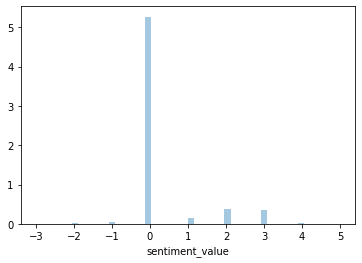

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

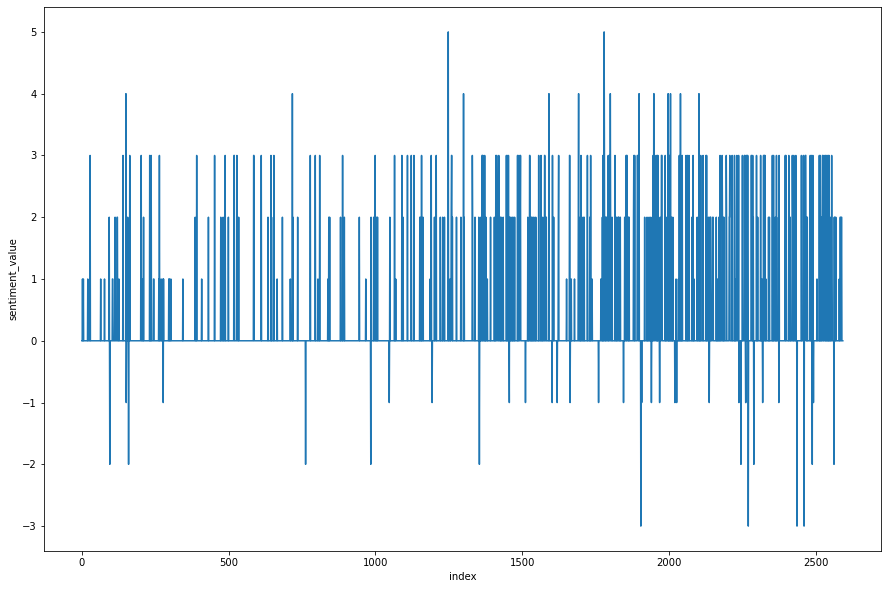

In [94]:
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

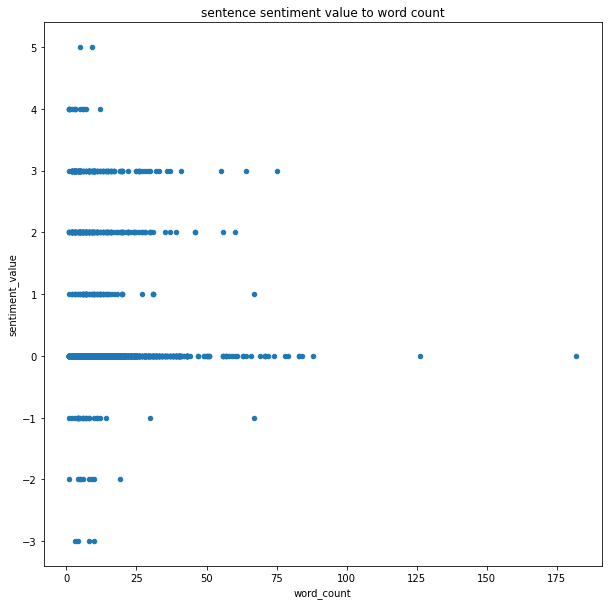

In [96]:
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(10,10),title='sentence sentiment value to word count')